# LSTM Multivariate Model

In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer

In [2]:
X_train = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train_scaled.csv')
X_cv = pd.read_csv('X_val_scaled.csv')
y_cv = pd.read_csv('y_val_scaled.csv')
X_train_cv = pd.read_csv('X_train_val_scaled.csv')
y_train_cv = pd.read_csv('y_train_val_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test_scaled.csv')

val =  pd.read_csv('val.csv')
y_val = pd.read_csv('y_val.csv')
test =  pd.read_csv('test.csv')
test_y = pd.read_csv('y_test.csv')

 ## Defining LSTM Model & MAPE Functions

In [3]:
def run(neurons, batchSize, numEpochs, X, Y, pred_set, orig, col_mean, col_std):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(neurons, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)
    
    predicted_price_df = pd.DataFrame(predicted_Price, columns=['Predicted Price'])
    
    # Scale Back Result
    est = predicted_price_df['Predicted Price'] * col_std + col_mean

    rmse = sqrt(mean_squared_error(orig, est))
    mape = get_mape(orig, est)
    
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

In [4]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Tuning Epochs Param

In [5]:
# vary training batches
param_label = 'epochs'
param_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# param_list = [10]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, default_batch_size, param, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 2s 2ms/step - loss: 0.0859
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0258
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0253
Epoch 4/50
14/14 [==============================] - 0s 10ms/step - loss: 0.0241
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0103
Epoch 7/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 8/50
14/14 [==============================] - 0s 7ms/step - loss: 0.0071
Epoch 9/50
14/14 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 11/50
14/14 [===========================

14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 49/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 50/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 51/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 52/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 53/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 54/100
14/14 [==============================] - 0s 2ms/step - loss: 9.8912e-04
Epoch 55/100
14/14 [==============================] - 0s 2ms/step - loss: 9.7457e-04
Epoch 56/100
14/14 [==============================] - 0s 2ms/step - loss: 9.6609e-04
Epoch 57/100
14/14 [==============================] - 0s 2ms/step - loss: 9.4979e-04
Epoch 58/100
14/14 [==============================] - 0s 2ms/step - loss: 9.4056e-04
Epoch 59/100
14/14 [==============================] - 0s 2ms/step - loss: 9.3675e-04
Epoch 60/100
14/1

14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 46/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 47/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 48/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 49/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 50/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 51/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 52/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 53/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 54/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 55/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 56/150
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 57/150
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 7.6249e-04
Epoch 144/150
14/14 [==============================] - 0s 2ms/step - loss: 7.1637e-04
Epoch 145/150
14/14 [==============================] - 0s 2ms/step - loss: 7.4174e-04
Epoch 146/150
14/14 [==============================] - 0s 2ms/step - loss: 7.8911e-04
Epoch 147/150
14/14 [==============================] - 0s 2ms/step - loss: 7.1835e-04
Epoch 148/150
14/14 [==============================] - 0s 2ms/step - loss: 7.8520e-04
Epoch 149/150
14/14 [==============================] - 0s 2ms/step - loss: 8.6905e-04
Epoch 150/150
14/14 [==============================] - 0s 2ms/step - loss: 7.4659e-04
RMSE on train set = 2629.951
MAPE on train set = 18.188%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/200
14/14 [==============================] - 2s 2ms/step - loss: 0.1312
Epoch 2/200
14/14 [========

Epoch 90/200
14/14 [==============================] - 0s 3ms/step - loss: 7.5029e-04
Epoch 91/200
14/14 [==============================] - 0s 3ms/step - loss: 7.4584e-04
Epoch 92/200
14/14 [==============================] - 0s 3ms/step - loss: 7.4060e-04
Epoch 93/200
14/14 [==============================] - 0s 2ms/step - loss: 7.3880e-04
Epoch 94/200
14/14 [==============================] - 0s 4ms/step - loss: 7.3627e-04
Epoch 95/200
14/14 [==============================] - 0s 3ms/step - loss: 7.2876e-04
Epoch 96/200
14/14 [==============================] - 0s 3ms/step - loss: 7.2790e-04
Epoch 97/200
14/14 [==============================] - 0s 3ms/step - loss: 7.3034e-04
Epoch 98/200
14/14 [==============================] - 0s 2ms/step - loss: 7.2105e-04
Epoch 99/200
14/14 [==============================] - 0s 3ms/step - loss: 7.2015e-04
Epoch 100/200
14/14 [==============================] - 0s 18ms/step - loss: 7.2636e-04
Epoch 101/200
14/14 [==============================] - 0s 3ms/s

14/14 [==============================] - 0s 2ms/step - loss: 6.1125e-04
Epoch 187/200
14/14 [==============================] - 0s 2ms/step - loss: 6.0962e-04
Epoch 188/200
14/14 [==============================] - 0s 3ms/step - loss: 6.0764e-04
Epoch 189/200
14/14 [==============================] - 0s 2ms/step - loss: 6.0498e-04
Epoch 190/200
14/14 [==============================] - 0s 2ms/step - loss: 6.0339e-04
Epoch 191/200
14/14 [==============================] - 0s 2ms/step - loss: 6.0151e-04
Epoch 192/200
14/14 [==============================] - 0s 3ms/step - loss: 5.9888e-04
Epoch 193/200
14/14 [==============================] - 0s 2ms/step - loss: 5.9751e-04
Epoch 194/200
14/14 [==============================] - 0s 2ms/step - loss: 5.9579e-04
Epoch 195/200
14/14 [==============================] - 0s 3ms/step - loss: 5.9301e-04
Epoch 196/200
14/14 [==============================] - 0s 2ms/step - loss: 5.9197e-04
Epoch 197/200
14/14 [==============================] - 0s 2ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 7.2816e-04
Epoch 83/250
14/14 [==============================] - 0s 3ms/step - loss: 7.1673e-04
Epoch 84/250
14/14 [==============================] - 0s 3ms/step - loss: 7.1497e-04
Epoch 85/250
14/14 [==============================] - 0s 2ms/step - loss: 7.1212e-04
Epoch 86/250
14/14 [==============================] - 0s 2ms/step - loss: 7.0032e-04
Epoch 87/250
14/14 [==============================] - 0s 2ms/step - loss: 7.0063e-04
Epoch 88/250
14/14 [==============================] - 0s 3ms/step - loss: 7.0006e-04
Epoch 89/250
14/14 [==============================] - 0s 3ms/step - loss: 6.8811e-04
Epoch 90/250
14/14 [==============================] - 0s 3ms/step - loss: 6.9177e-04
Epoch 91/250
14/14 [==============================] - 0s 2ms/step - loss: 6.9665e-04
Epoch 92/250
14/14 [==============================] - 0s 2ms/step - loss: 6.8772e-04
Epoch 93/250
14/14 [==============================] - 0s 2ms/step - loss: 6.96

14/14 [==============================] - 0s 2ms/step - loss: 5.9712e-04
Epoch 180/250
14/14 [==============================] - 0s 2ms/step - loss: 7.1873e-04
Epoch 181/250
14/14 [==============================] - 0s 2ms/step - loss: 7.0277e-04
Epoch 182/250
14/14 [==============================] - 0s 2ms/step - loss: 5.9758e-04
Epoch 183/250
14/14 [==============================] - 0s 2ms/step - loss: 7.2827e-04
Epoch 184/250
14/14 [==============================] - 0s 2ms/step - loss: 9.2576e-04
Epoch 185/250
14/14 [==============================] - 0s 2ms/step - loss: 8.3251e-04
Epoch 186/250
14/14 [==============================] - 0s 2ms/step - loss: 7.4443e-04
Epoch 187/250
14/14 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 188/250
14/14 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 189/250
14/14 [==============================] - 0s 2ms/step - loss: 9.4427e-04
Epoch 190/250
14/14 [==============================] - 0s 3ms/step - loss: 9

14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 25/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 26/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 27/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 28/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 29/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 30/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 31/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 32/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 33/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 34/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 35/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 36/300
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 123/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0115
Epoch 124/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 125/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 126/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 127/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 128/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 129/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 130/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 131/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 132/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 133/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 134/300
14/14 [=========

14/14 [==============================] - 0s 3ms/step - loss: 0.0024
Epoch 223/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 224/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 225/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 226/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 227/300
14/14 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 228/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 229/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 230/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 231/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 232/300
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 233/300
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 234/300
14/14 [=========

14/14 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 20/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0025
Epoch 21/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 22/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 23/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0019
Epoch 24/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 25/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 26/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 27/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 28/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 29/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 30/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 31/350
14/14 [=====================

14/14 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 119/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 120/350
14/14 [==============================] - 0s 2ms/step - loss: 7.0346e-04
Epoch 121/350
14/14 [==============================] - 0s 2ms/step - loss: 9.3644e-04
Epoch 122/350
14/14 [==============================] - 0s 2ms/step - loss: 9.5537e-04
Epoch 123/350
14/14 [==============================] - 0s 2ms/step - loss: 6.8418e-04
Epoch 124/350
14/14 [==============================] - 0s 2ms/step - loss: 8.7178e-04
Epoch 125/350
14/14 [==============================] - 0s 2ms/step - loss: 9.3729e-04
Epoch 126/350
14/14 [==============================] - 0s 2ms/step - loss: 6.8991e-04
Epoch 127/350
14/14 [==============================] - 0s 2ms/step - loss: 8.9378e-04
Epoch 128/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 129/350
14/14 [==============================] - 0s 3ms/step - loss: 7.183

14/14 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 217/350
14/14 [==============================] - 0s 2ms/step - loss: 7.9143e-04
Epoch 218/350
14/14 [==============================] - 0s 2ms/step - loss: 9.9973e-04
Epoch 219/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 220/350
14/14 [==============================] - 0s 2ms/step - loss: 9.8899e-04
Epoch 221/350
14/14 [==============================] - 0s 2ms/step - loss: 8.0721e-04
Epoch 222/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 223/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 224/350
14/14 [==============================] - 0s 3ms/step - loss: 6.7148e-04
Epoch 225/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 226/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 227/350
14/14 [==============================] - 0s 2ms/step - loss: 7.6249e-04
Epoch 

14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 314/350
14/14 [==============================] - 0s 3ms/step - loss: 6.6137e-04
Epoch 315/350
14/14 [==============================] - 0s 3ms/step - loss: 9.4116e-04
Epoch 316/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 317/350
14/14 [==============================] - 0s 3ms/step - loss: 8.8185e-04
Epoch 318/350
14/14 [==============================] - 0s 2ms/step - loss: 5.8883e-04
Epoch 319/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 320/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 321/350
14/14 [==============================] - 0s 3ms/step - loss: 7.5055e-04
Epoch 322/350
14/14 [==============================] - 0s 3ms/step - loss: 6.0084e-04
Epoch 323/350
14/14 [==============================] - 0s 2ms/step - loss: 9.2103e-04
Epoch 324/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Ep

14/14 [==============================] - 0s 5ms/step - loss: 9.4299e-04
Epoch 60/400
14/14 [==============================] - 0s 3ms/step - loss: 9.3816e-04
Epoch 61/400
14/14 [==============================] - 0s 3ms/step - loss: 9.2191e-04
Epoch 62/400
14/14 [==============================] - 0s 3ms/step - loss: 9.1727e-04
Epoch 63/400
14/14 [==============================] - 0s 2ms/step - loss: 9.1143e-04
Epoch 64/400
14/14 [==============================] - 0s 2ms/step - loss: 9.0469e-04
Epoch 65/400
14/14 [==============================] - 0s 2ms/step - loss: 8.9978e-04
Epoch 66/400
14/14 [==============================] - 0s 3ms/step - loss: 8.9169e-04
Epoch 67/400
14/14 [==============================] - 0s 3ms/step - loss: 8.9775e-04
Epoch 68/400
14/14 [==============================] - 0s 2ms/step - loss: 8.8757e-04
Epoch 69/400
14/14 [==============================] - 0s 2ms/step - loss: 8.8088e-04
Epoch 70/400
14/14 [==============================] - 0s 2ms/step - loss: 9.11

14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 157/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 158/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 159/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 160/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 161/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 162/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 163/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 164/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 165/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 166/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 167/400
14/14 [==============================] - 0s 2ms/step - loss: 9.9136e-04
Epoch 168/400
14/14 [=====

Epoch 253/400
14/14 [==============================] - 0s 3ms/step - loss: 8.7774e-04
Epoch 254/400
14/14 [==============================] - 0s 3ms/step - loss: 8.1833e-04
Epoch 255/400
14/14 [==============================] - 0s 3ms/step - loss: 7.9062e-04
Epoch 256/400
14/14 [==============================] - 0s 3ms/step - loss: 7.1779e-04
Epoch 257/400
14/14 [==============================] - 0s 2ms/step - loss: 6.8867e-04
Epoch 258/400
14/14 [==============================] - 0s 2ms/step - loss: 6.3469e-04
Epoch 259/400
14/14 [==============================] - 0s 2ms/step - loss: 6.0465e-04
Epoch 260/400
14/14 [==============================] - 0s 2ms/step - loss: 5.7577e-04
Epoch 261/400
14/14 [==============================] - 0s 2ms/step - loss: 5.6278e-04
Epoch 262/400
14/14 [==============================] - 0s 3ms/step - loss: 5.5836e-04
Epoch 263/400
14/14 [==============================] - 0s 3ms/step - loss: 5.5495e-04
Epoch 264/400
14/14 [==============================] -

14/14 [==============================] - 0s 2ms/step - loss: 4.6367e-04
Epoch 350/400
14/14 [==============================] - 0s 2ms/step - loss: 4.5920e-04
Epoch 351/400
14/14 [==============================] - 0s 2ms/step - loss: 4.6063e-04
Epoch 352/400
14/14 [==============================] - 0s 2ms/step - loss: 4.7377e-04
Epoch 353/400
14/14 [==============================] - 0s 2ms/step - loss: 4.6364e-04
Epoch 354/400
14/14 [==============================] - 0s 2ms/step - loss: 4.7117e-04
Epoch 355/400
14/14 [==============================] - 0s 2ms/step - loss: 5.3698e-04
Epoch 356/400
14/14 [==============================] - 0s 2ms/step - loss: 5.0838e-04
Epoch 357/400
14/14 [==============================] - 0s 2ms/step - loss: 5.7190e-04
Epoch 358/400
14/14 [==============================] - 0s 2ms/step - loss: 8.4015e-04
Epoch 359/400
14/14 [==============================] - 0s 2ms/step - loss: 7.1696e-04
Epoch 360/400
14/14 [==============================] - 0s 2ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 46/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 47/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 48/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 49/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 50/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 51/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 52/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 53/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 54/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 55/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 56/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 57/450
14/14 [=====================

14/14 [==============================] - 0s 3ms/step - loss: 8.5759e-04
Epoch 144/450
14/14 [==============================] - 0s 2ms/step - loss: 8.7923e-04
Epoch 145/450
14/14 [==============================] - 0s 2ms/step - loss: 8.5048e-04
Epoch 146/450
14/14 [==============================] - 0s 2ms/step - loss: 8.7928e-04
Epoch 147/450
14/14 [==============================] - 0s 2ms/step - loss: 8.6416e-04
Epoch 148/450
14/14 [==============================] - 0s 2ms/step - loss: 9.0702e-04
Epoch 149/450
14/14 [==============================] - 0s 2ms/step - loss: 9.0322e-04
Epoch 150/450
14/14 [==============================] - 0s 3ms/step - loss: 9.7100e-04
Epoch 151/450
14/14 [==============================] - 0s 3ms/step - loss: 9.8006e-04
Epoch 152/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 153/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 154/450
14/14 [==============================] - 0s 2ms/step - loss: 0

14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 243/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 244/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 245/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 246/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 247/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 248/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 249/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 250/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 251/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 252/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 253/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 254/450
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 343/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 344/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 345/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 346/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 347/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 348/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 349/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 350/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 351/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 352/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 353/450
14/14 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 354/450
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 443/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 444/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 445/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 446/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 447/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 448/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 449/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 450/450
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
RMSE on train set = 2631.922
MAPE on train set = 18.190%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
14/14 [==============================] - 2s 2

Epoch 90/500
14/14 [==============================] - 0s 2ms/step - loss: 8.2661e-04
Epoch 91/500
14/14 [==============================] - 0s 2ms/step - loss: 8.2735e-04
Epoch 92/500
14/14 [==============================] - 0s 2ms/step - loss: 8.2722e-04
Epoch 93/500
14/14 [==============================] - 0s 2ms/step - loss: 8.1670e-04
Epoch 94/500
14/14 [==============================] - 0s 2ms/step - loss: 8.2735e-04
Epoch 95/500
14/14 [==============================] - 0s 2ms/step - loss: 8.2899e-04
Epoch 96/500
14/14 [==============================] - 0s 2ms/step - loss: 8.2521e-04
Epoch 97/500
14/14 [==============================] - 0s 2ms/step - loss: 8.6300e-04
Epoch 98/500
14/14 [==============================] - 0s 3ms/step - loss: 8.6073e-04
Epoch 99/500
14/14 [==============================] - 0s 2ms/step - loss: 9.3910e-04
Epoch 100/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 101/500
14/14 [==============================] - 0s 2ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 188/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 189/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0146
Epoch 190/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0495
Epoch 191/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0391
Epoch 192/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0964
Epoch 193/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 194/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0143
Epoch 195/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0158
Epoch 196/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 197/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 198/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 199/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 286/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 287/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 288/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 289/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 290/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 291/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 292/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 293/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 294/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 295/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 296/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 297/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 386/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 387/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 388/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 389/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 390/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 391/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 392/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 393/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 394/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 395/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 396/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 397/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 486/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 487/500
14/14 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 488/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 489/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 490/500
14/14 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 491/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 492/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 493/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 494/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 495/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 496/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 497/500
14/14 [=========

,epochs,rmse,mape
0,50,2637.811047,18.202564
1,100,2619.546956,18.169750
2,150,2629.951256,18.188298
3,200,2637.467499,18.193150
4,250,2630.190813,18.214543
5,300,2638.404206,18.180126
6,350,2595.634978,18.165022
7,400,2644.452725,18.202370
8,450,2631.922089,18.189853
9,500,2650.905937,18.245074


In [6]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 2595.635
optimum params = 350


In [7]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 18.165%
optimum params = 350


## Tuning Batch Size Parameter

In [8]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, param, epoch_opt, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/350
14/14 [==============================] - 2s 2ms/step - loss: 0.1282
Epoch 2/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 3/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 4/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0377
Epoch 5/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0268
Epoch 6/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 7/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 8/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0067
Epoch 9/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 10/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 11/350
14/14 [=================

14/14 [==============================] - 0s 5ms/step - loss: 7.9489e-04
Epoch 99/350
14/14 [==============================] - 0s 3ms/step - loss: 8.9118e-04
Epoch 100/350
14/14 [==============================] - 0s 3ms/step - loss: 9.1758e-04
Epoch 101/350
14/14 [==============================] - 0s 2ms/step - loss: 9.5221e-04
Epoch 102/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 103/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 104/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 105/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 106/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 107/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 108/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 109/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 110/350
1

14/14 [==============================] - 0s 2ms/step - loss: 5.7440e-04
Epoch 196/350
14/14 [==============================] - 0s 2ms/step - loss: 5.8244e-04
Epoch 197/350
14/14 [==============================] - 0s 3ms/step - loss: 5.8016e-04
Epoch 198/350
14/14 [==============================] - 0s 2ms/step - loss: 5.7024e-04
Epoch 199/350
14/14 [==============================] - 0s 2ms/step - loss: 5.8754e-04
Epoch 200/350
14/14 [==============================] - 0s 4ms/step - loss: 5.8746e-04
Epoch 201/350
14/14 [==============================] - 0s 3ms/step - loss: 5.7321e-04
Epoch 202/350
14/14 [==============================] - 0s 4ms/step - loss: 6.1738e-04
Epoch 203/350
14/14 [==============================] - 0s 3ms/step - loss: 6.2179e-04
Epoch 204/350
14/14 [==============================] - 0s 3ms/step - loss: 6.1160e-04
Epoch 205/350
14/14 [==============================] - 0s 3ms/step - loss: 7.3843e-04
Epoch 206/350
14/14 [==============================] - 0s 3ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 293/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 294/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 295/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 296/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 297/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 298/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 299/350
14/14 [==============================] - 0s 2ms/step - loss: 9.4850e-04
Epoch 300/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 301/350
14/14 [==============================] - 0s 2ms/step - loss: 8.7517e-04
Epoch 302/350
14/14 [==============================] - 0s 2ms/step - loss: 9.2354e-04
Epoch 303/350
14/14 [==============================] - 0s 2ms/step - loss: 8.4303e-04
Epoch 304/350


7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 41/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 42/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 43/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 44/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 45/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 46/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 47/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 48/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 49/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 50/350
7/7 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 51/350
7/7 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 52/350
7/7 [==============================] - 0s 2ms/step -

Epoch 140/350
7/7 [==============================] - 0s 3ms/step - loss: 6.8732e-04
Epoch 141/350
7/7 [==============================] - 0s 3ms/step - loss: 6.8443e-04
Epoch 142/350
7/7 [==============================] - 0s 3ms/step - loss: 6.8225e-04
Epoch 143/350
7/7 [==============================] - 0s 3ms/step - loss: 6.7969e-04
Epoch 144/350
7/7 [==============================] - 0s 3ms/step - loss: 6.7756e-04
Epoch 145/350
7/7 [==============================] - 0s 5ms/step - loss: 6.7491e-04
Epoch 146/350
7/7 [==============================] - 0s 2ms/step - loss: 6.7292e-04
Epoch 147/350
7/7 [==============================] - 0s 3ms/step - loss: 6.7023e-04
Epoch 148/350
7/7 [==============================] - 0s 3ms/step - loss: 6.6846e-04
Epoch 149/350
7/7 [==============================] - 0s 4ms/step - loss: 6.6595e-04
Epoch 150/350
7/7 [==============================] - 0s 2ms/step - loss: 6.6440e-04
Epoch 151/350
7/7 [==============================] - 0s 3ms/step - loss: 6.6

7/7 [==============================] - 0s 2ms/step - loss: 5.8538e-04
Epoch 239/350
7/7 [==============================] - 0s 5ms/step - loss: 5.7985e-04
Epoch 240/350
7/7 [==============================] - 0s 3ms/step - loss: 5.7859e-04
Epoch 241/350
7/7 [==============================] - 0s 2ms/step - loss: 5.7367e-04
Epoch 242/350
7/7 [==============================] - 0s 3ms/step - loss: 5.7263e-04
Epoch 243/350
7/7 [==============================] - 0s 4ms/step - loss: 5.6845e-04
Epoch 244/350
7/7 [==============================] - 0s 2ms/step - loss: 5.6742e-04
Epoch 245/350
7/7 [==============================] - 0s 2ms/step - loss: 5.6459e-04
Epoch 246/350
7/7 [==============================] - 0s 3ms/step - loss: 5.6405e-04
Epoch 247/350
7/7 [==============================] - 0s 2ms/step - loss: 5.6164e-04
Epoch 248/350
7/7 [==============================] - 0s 3ms/step - loss: 5.6141e-04
Epoch 249/350
7/7 [==============================] - 0s 2ms/step - loss: 5.5904e-04
Epoch 

7/7 [==============================] - 0s 3ms/step - loss: 6.3695e-04
Epoch 337/350
7/7 [==============================] - 0s 3ms/step - loss: 5.6704e-04
Epoch 338/350
7/7 [==============================] - 0s 2ms/step - loss: 5.2956e-04
Epoch 339/350
7/7 [==============================] - 0s 2ms/step - loss: 5.2171e-04
Epoch 340/350
7/7 [==============================] - 0s 2ms/step - loss: 5.2102e-04
Epoch 341/350
7/7 [==============================] - 0s 2ms/step - loss: 5.1452e-04
Epoch 342/350
7/7 [==============================] - 0s 2ms/step - loss: 5.1369e-04
Epoch 343/350
7/7 [==============================] - 0s 2ms/step - loss: 5.0805e-04
Epoch 344/350
7/7 [==============================] - 0s 2ms/step - loss: 5.0640e-04
Epoch 345/350
7/7 [==============================] - 0s 2ms/step - loss: 5.0358e-04
Epoch 346/350
7/7 [==============================] - 0s 2ms/step - loss: 5.0291e-04
Epoch 347/350
7/7 [==============================] - 0s 2ms/step - loss: 5.0089e-04
Epoch 

4/4 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 87/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 88/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 89/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 90/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 91/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 92/350
4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 93/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 94/350
4/4 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 95/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 96/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 97/350
4/4 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 98/350
4/4 [==============================] - 0s 2ms/step -

Epoch 187/350
4/4 [==============================] - 0s 4ms/step - loss: 8.4263e-04
Epoch 188/350
4/4 [==============================] - 0s 4ms/step - loss: 8.3918e-04
Epoch 189/350
4/4 [==============================] - 0s 3ms/step - loss: 8.3576e-04
Epoch 190/350
4/4 [==============================] - 0s 3ms/step - loss: 8.3242e-04
Epoch 191/350
4/4 [==============================] - 0s 4ms/step - loss: 8.2916e-04
Epoch 192/350
4/4 [==============================] - 0s 3ms/step - loss: 8.2585e-04
Epoch 193/350
4/4 [==============================] - 0s 3ms/step - loss: 8.2271e-04
Epoch 194/350
4/4 [==============================] - 0s 3ms/step - loss: 8.1956e-04
Epoch 195/350
4/4 [==============================] - 0s 3ms/step - loss: 8.1647e-04
Epoch 196/350
4/4 [==============================] - 0s 3ms/step - loss: 8.1341e-04
Epoch 197/350
4/4 [==============================] - 0s 3ms/step - loss: 8.1041e-04
Epoch 198/350
4/4 [==============================] - 0s 3ms/step - loss: 8.0

4/4 [==============================] - 0s 5ms/step - loss: 6.2896e-04
Epoch 285/350
4/4 [==============================] - 0s 6ms/step - loss: 6.2750e-04
Epoch 286/350
4/4 [==============================] - 0s 9ms/step - loss: 6.2626e-04
Epoch 287/350
4/4 [==============================] - 0s 6ms/step - loss: 6.2482e-04
Epoch 288/350
4/4 [==============================] - 0s 20ms/step - loss: 6.2384e-04
Epoch 289/350
4/4 [==============================] - 0s 3ms/step - loss: 6.2244e-04
Epoch 290/350
4/4 [==============================] - 0s 3ms/step - loss: 6.2169e-04
Epoch 291/350
4/4 [==============================] - 0s 3ms/step - loss: 6.2000e-04
Epoch 292/350
4/4 [==============================] - 0s 3ms/step - loss: 6.1930e-04
Epoch 293/350
4/4 [==============================] - 0s 5ms/step - loss: 6.1781e-04
Epoch 294/350
4/4 [==============================] - 0s 5ms/step - loss: 6.1747e-04
Epoch 295/350
4/4 [==============================] - 0s 7ms/step - loss: 6.1556e-04
Epoch

2/2 [==============================] - 0s 5ms/step - loss: 0.0102
Epoch 31/350
2/2 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 32/350
2/2 [==============================] - 0s 6ms/step - loss: 0.0091
Epoch 33/350
2/2 [==============================] - 0s 4ms/step - loss: 0.0086
Epoch 34/350
2/2 [==============================] - 0s 6ms/step - loss: 0.0082
Epoch 35/350
2/2 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 36/350
2/2 [==============================] - 0s 6ms/step - loss: 0.0075
Epoch 37/350
2/2 [==============================] - 0s 6ms/step - loss: 0.0072
Epoch 38/350
2/2 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 39/350
2/2 [==============================] - 0s 3ms/step - loss: 0.0068
Epoch 40/350
2/2 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 41/350
2/2 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 42/350
2/2 [==============================] - 0s 4ms/step -

2/2 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 134/350
2/2 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 135/350
2/2 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 136/350
2/2 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 137/350
2/2 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 138/350
2/2 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 139/350
2/2 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 140/350
2/2 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 141/350
2/2 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 142/350
2/2 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 143/350
2/2 [==============================] - 0s 5ms/step - loss: 0.0012
Epoch 144/350
2/2 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 145/350
2/2 [==============================] -

2/2 [==============================] - 0s 5ms/step - loss: 8.5807e-04
Epoch 234/350
2/2 [==============================] - 0s 7ms/step - loss: 8.5556e-04
Epoch 235/350
2/2 [==============================] - 0s 5ms/step - loss: 8.5308e-04
Epoch 236/350
2/2 [==============================] - 0s 5ms/step - loss: 8.5061e-04
Epoch 237/350
2/2 [==============================] - 0s 5ms/step - loss: 8.4814e-04
Epoch 238/350
2/2 [==============================] - 0s 7ms/step - loss: 8.4568e-04
Epoch 239/350
2/2 [==============================] - 0s 6ms/step - loss: 8.4326e-04
Epoch 240/350
2/2 [==============================] - 0s 4ms/step - loss: 8.4086e-04
Epoch 241/350
2/2 [==============================] - 0s 6ms/step - loss: 8.3846e-04
Epoch 242/350
2/2 [==============================] - 0s 6ms/step - loss: 8.3606e-04
Epoch 243/350
2/2 [==============================] - 0s 4ms/step - loss: 8.3368e-04
Epoch 244/350
2/2 [==============================] - 0s 4ms/step - loss: 8.3134e-04
Epoch 

2/2 [==============================] - 0s 4ms/step - loss: 6.6678e-04
Epoch 331/350
2/2 [==============================] - 0s 4ms/step - loss: 6.6542e-04
Epoch 332/350
2/2 [==============================] - 0s 4ms/step - loss: 6.6410e-04
Epoch 333/350
2/2 [==============================] - 0s 4ms/step - loss: 6.6277e-04
Epoch 334/350
2/2 [==============================] - 0s 5ms/step - loss: 6.6145e-04
Epoch 335/350
2/2 [==============================] - 0s 6ms/step - loss: 6.6014e-04
Epoch 336/350
2/2 [==============================] - 0s 5ms/step - loss: 6.5885e-04
Epoch 337/350
2/2 [==============================] - 0s 5ms/step - loss: 6.5756e-04
Epoch 338/350
2/2 [==============================] - 0s 5ms/step - loss: 6.5628e-04
Epoch 339/350
2/2 [==============================] - 0s 6ms/step - loss: 6.5499e-04
Epoch 340/350
2/2 [==============================] - 0s 5ms/step - loss: 6.5371e-04
Epoch 341/350
2/2 [==============================] - 0s 6ms/step - loss: 6.5245e-04
Epoch 

,batch_size,rmse,mape
0,32,2620.688806,18.174567
1,64,2621.225437,18.193793
2,128,2647.907342,18.211634
3,256,2638.843533,18.176442


In [9]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 2620.689
optimum params = 32


In [10]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 18.175%
optimum params = 32


In [11]:
# vary neurons
param_label = 'neurons'
param_list = [10, 20, 30, 40, 50]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(param, default_batch_size, epoch_opt, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/350
14/14 [==============================] - 2s 2ms/step - loss: 0.1407
Epoch 2/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0730
Epoch 3/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0317
Epoch 4/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0275
Epoch 5/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0285
Epoch 6/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0231
Epoch 7/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 8/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 9/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 10/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 11/350
14/14 [=================

14/14 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 101/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 102/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 103/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 104/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 105/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 106/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 107/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 108/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 109/350
14/14 [==============================] - 0s 2ms/step - loss: 9.9018e-04
Epoch 110/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 111/350
14/14 [==============================] - 0s 2ms/step - loss: 9.5460e-04
Epoch 112/350
14/14 [=

14/14 [==============================] - 0s 2ms/step - loss: 7.0304e-04
Epoch 198/350
14/14 [==============================] - 0s 2ms/step - loss: 6.7986e-04
Epoch 199/350
14/14 [==============================] - 0s 2ms/step - loss: 7.2045e-04
Epoch 200/350
14/14 [==============================] - 0s 2ms/step - loss: 6.9409e-04
Epoch 201/350
14/14 [==============================] - 0s 2ms/step - loss: 6.9745e-04
Epoch 202/350
14/14 [==============================] - 0s 2ms/step - loss: 7.2687e-04
Epoch 203/350
14/14 [==============================] - 0s 2ms/step - loss: 6.9863e-04
Epoch 204/350
14/14 [==============================] - 0s 2ms/step - loss: 7.5046e-04
Epoch 205/350
14/14 [==============================] - 0s 2ms/step - loss: 7.5460e-04
Epoch 206/350
14/14 [==============================] - 0s 3ms/step - loss: 7.3017e-04
Epoch 207/350
14/14 [==============================] - 0s 2ms/step - loss: 8.8121e-04
Epoch 208/350
14/14 [==============================] - 0s 2ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 295/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 296/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 297/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 298/350
14/14 [==============================] - 0s 2ms/step - loss: 6.6065e-04
Epoch 299/350
14/14 [==============================] - 0s 2ms/step - loss: 9.1616e-04
Epoch 300/350
14/14 [==============================] - 0s 2ms/step - loss: 7.6232e-04
Epoch 301/350
14/14 [==============================] - 0s 2ms/step - loss: 5.6564e-04
Epoch 302/350
14/14 [==============================] - 0s 2ms/step - loss: 5.6553e-04
Epoch 303/350
14/14 [==============================] - 0s 2ms/step - loss: 5.6657e-04
Epoch 304/350
14/14 [==============================] - 0s 2ms/step - loss: 5.4670e-04
Epoch 305/350
14/14 [==============================] - 0s 2ms/step - loss: 5.4429e-0

14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 41/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 42/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 43/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 44/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 45/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 46/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 47/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 48/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 49/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 50/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 51/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 52/350
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 140/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 141/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 142/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 143/350
14/14 [==============================] - 0s 2ms/step - loss: 9.5726e-04
Epoch 144/350
14/14 [==============================] - 0s 2ms/step - loss: 8.3102e-04
Epoch 145/350
14/14 [==============================] - 0s 2ms/step - loss: 7.8041e-04
Epoch 146/350
14/14 [==============================] - 0s 2ms/step - loss: 7.5841e-04
Epoch 147/350
14/14 [==============================] - 0s 2ms/step - loss: 7.5596e-04
Epoch 148/350
14/14 [==============================] - 0s 2ms/step - loss: 7.5157e-04
Epoch 149/350
14/14 [==============================] - 0s 2ms/step - loss: 7.4447e-04
Epoch 150/350
14/14 [==============================] - 0s 2ms/step - loss: 7.4194e-0

14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 238/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 239/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 240/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 241/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 242/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 243/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 244/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 245/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 246/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 247/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 248/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 249/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 338/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 339/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 340/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 341/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 342/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 343/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 344/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 345/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 346/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 347/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 348/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 349/350
14/14 [=========

Epoch 85/350
14/14 [==============================] - 0s 2ms/step - loss: 9.0815e-04
Epoch 86/350
14/14 [==============================] - 0s 2ms/step - loss: 9.0344e-04
Epoch 87/350
14/14 [==============================] - 0s 2ms/step - loss: 8.9608e-04
Epoch 88/350
14/14 [==============================] - 0s 2ms/step - loss: 8.8993e-04
Epoch 89/350
14/14 [==============================] - 0s 3ms/step - loss: 8.8594e-04
Epoch 90/350
14/14 [==============================] - 0s 2ms/step - loss: 8.7903e-04
Epoch 91/350
14/14 [==============================] - 0s 2ms/step - loss: 8.7197e-04
Epoch 92/350
14/14 [==============================] - 0s 2ms/step - loss: 8.6978e-04
Epoch 93/350
14/14 [==============================] - 0s 2ms/step - loss: 8.6520e-04
Epoch 94/350
14/14 [==============================] - 0s 2ms/step - loss: 8.5671e-04
Epoch 95/350
14/14 [==============================] - 0s 2ms/step - loss: 8.5709e-04
Epoch 96/350
14/14 [==============================] - 0s 2ms/step

14/14 [==============================] - 0s 2ms/step - loss: 7.2703e-04
Epoch 182/350
14/14 [==============================] - 0s 2ms/step - loss: 7.0089e-04
Epoch 183/350
14/14 [==============================] - 0s 2ms/step - loss: 6.8257e-04
Epoch 184/350
14/14 [==============================] - 0s 2ms/step - loss: 6.7600e-04
Epoch 185/350
14/14 [==============================] - 0s 2ms/step - loss: 6.7214e-04
Epoch 186/350
14/14 [==============================] - 0s 2ms/step - loss: 6.7816e-04
Epoch 187/350
14/14 [==============================] - 0s 2ms/step - loss: 6.7667e-04
Epoch 188/350
14/14 [==============================] - 0s 2ms/step - loss: 6.9470e-04
Epoch 189/350
14/14 [==============================] - 0s 2ms/step - loss: 7.0261e-04
Epoch 190/350
14/14 [==============================] - 0s 2ms/step - loss: 6.9282e-04
Epoch 191/350
14/14 [==============================] - 0s 2ms/step - loss: 6.8368e-04
Epoch 192/350
14/14 [==============================] - 0s 2ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 8.0716e-04
Epoch 278/350
14/14 [==============================] - 0s 2ms/step - loss: 7.9306e-04
Epoch 279/350
14/14 [==============================] - 0s 2ms/step - loss: 7.6440e-04
Epoch 280/350
14/14 [==============================] - 0s 2ms/step - loss: 7.5139e-04
Epoch 281/350
14/14 [==============================] - 0s 2ms/step - loss: 7.3064e-04
Epoch 282/350
14/14 [==============================] - 0s 2ms/step - loss: 7.2029e-04
Epoch 283/350
14/14 [==============================] - 0s 2ms/step - loss: 7.0508e-04
Epoch 284/350
14/14 [==============================] - 0s 2ms/step - loss: 6.9634e-04
Epoch 285/350
14/14 [==============================] - 0s 2ms/step - loss: 6.8448e-04
Epoch 286/350
14/14 [==============================] - 0s 2ms/step - loss: 6.7725e-04
Epoch 287/350
14/14 [==============================] - 0s 2ms/step - loss: 6.6797e-04
Epoch 288/350
14/14 [==============================] - 0s 2ms/step -

14/14 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 22/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 23/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 24/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 25/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 26/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 27/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 28/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 29/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 30/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 31/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 32/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0012
Epoch 33/350
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 123/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 124/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 125/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 126/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 127/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 128/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 129/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 130/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0023
Epoch 131/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 132/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 133/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 134/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 223/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 224/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 225/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 226/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 227/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 228/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 229/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 230/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 231/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 232/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 233/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 234/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 323/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 324/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 325/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 326/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 327/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 328/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 329/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 330/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 331/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 332/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 333/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 334/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 71/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 72/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 73/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 74/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0043
Epoch 75/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 76/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 77/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 78/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 79/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 80/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 81/350
14/14 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 82/350
14/14 [=====================

14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 171/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 172/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 173/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 174/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 175/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 176/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 177/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 178/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 179/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 180/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 181/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 182/350
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 271/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 272/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 273/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 274/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 275/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 276/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 277/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 278/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 279/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 280/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 281/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 282/350
14/14 [=========

,neurons,rmse,mape
0,10,2642.445682,18.236719
1,20,2654.316004,18.204189
2,30,2648.837359,18.213119
3,40,2651.866831,18.189671
4,50,2619.507148,18.165610


In [12]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
neurons_opt = temp['neurons'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(neurons_opt))

min RMSE = 2619.507
optimum params = 50


In [13]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['neurons'].values[0]))

min MAPE = 18.166%
optimum params = 50


## Model with Optimal Parameters

In [14]:
# Process the data for LSTM
testX =np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX =np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [15]:
# Building the LSTM Model

start = time.time()


lstm = Sequential()
lstm.add(LSTM(neurons_opt, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)
# LSTM Prediction
y_pred = lstm.predict(X_test)

predicted_price_df = pd.DataFrame(y_pred, columns=['Predicted Price'])
    
# Scale Back Result
est = predicted_price_df['Predicted Price'] * test['Close_std'] + test['Close_mean']

end = time.time()
time_elapsed = end - start
print("Time Elapsed = ", time_elapsed)


rmse = sqrt(mean_squared_error(test_y, est))
mape = get_mape(test_y, est)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/350
19/19 [==============================] - 2s 2ms/step - loss: 0.0914 
Epoch 2/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 3/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 4/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0163
Epoch 5/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 6/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 7/350
19/19 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 8/350
19/19 [==============================] - 0s 3ms/step - loss: 0.0066
Epoch 9/350
19/19 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 10/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 11/350
19/19 [================

19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 101/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 102/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 103/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 104/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 105/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 106/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 107/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 108/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 109/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 110/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 111/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 112/350
19/19 [=========

19/19 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 201/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 202/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 203/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 204/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 205/350
19/19 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 206/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 207/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 208/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 209/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 210/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 211/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 212/350
19/19 [=========

19/19 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 301/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 302/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 303/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 304/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 305/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 306/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 307/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 308/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 309/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 310/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 311/350
19/19 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 312/350
19/19 [=========

In [16]:
est5 = est
est4 = est
est3 = est
est2 = est
est1 = est
est5

0      55190.565733
1      55083.808700
2      56261.543629
3      56613.044828
4      57276.921682
           ...     
140    38924.662541
141    38836.439220
142    40944.025525
143    42778.344899
144    43819.428165
Length: 145, dtype: float64

In [17]:
test5_y = test_y
test4_y = test_y
test3_y = test_y
test2_y = test_y
test1_y = test_y
test1_y

,Close
0,54663.6
1,57471.9
2,56004.5
3,57367.2
4,57344.9
...,...
140,37706.7
141,43179.8
142,44428.2
143,43896.9


In [18]:
delay_df_5 = test5_y.merge(est5.to_frame(), left_index=True, right_index=True)
delay_df_5 = delay_df_5.reset_index()
delay_df_5 = delay_df_5.drop(columns=['index'])
delay_df_5 = delay_df_5.to_numpy()
delay_df_5 = delay_df_5.flatten()
indexer_5 = np.arange(10)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_4 = test4_y.merge(est4.to_frame(), left_index=True, right_index=True)
delay_df_4 = delay_df_4.reset_index()
delay_df_4 = delay_df_4.drop(columns=['index'])
delay_df_4 = delay_df_4.to_numpy()
delay_df_4 = delay_df_4.flatten()
indexer_4 = np.arange(8)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_3 = test3_y.merge(est3.to_frame(), left_index=True, right_index=True)
delay_df_3 = delay_df_3.reset_index()
delay_df_3 = delay_df_3.drop(columns=['index'])
delay_df_3 = delay_df_3.to_numpy()
delay_df_3 = delay_df_3.flatten()
indexer_3 = np.arange(6)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_2 = test2_y.merge(est2.to_frame(), left_index=True, right_index=True)
delay_df_2 = delay_df_2.reset_index()
delay_df_2 = delay_df_2.drop(columns=['index'])
delay_df_2 = delay_df_2.to_numpy()
delay_df_2 = delay_df_2.flatten()
indexer_2 = np.arange(4)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

delay_df_1 = test1_y.merge(est1.to_frame(), left_index=True, right_index=True)
delay_df_1 = delay_df_1.reset_index()
delay_df_1 = delay_df_1.drop(columns=['index'])
delay_df_1 = delay_df_1.to_numpy()
delay_df_1 = delay_df_1.flatten()
indexer_1 = np.arange(2)[None, :] + 2*np.arange(140)[:, None] #sliding window indices

In [19]:
# window size 5
rmse_mean = 0
mape_mean = 0
for i in range(140-5+1):
    window = delay_df_5[indexer_5][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + sqrt(mean_squared_error(test_series, est_series))
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-5+1)  
mape_mean = mape_mean/(140-5+1) 

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2541.149
MAPE on test set = 4.267%


In [20]:
# window size 4
rmse_mean = 0
mape_mean = 0
for i in range(140-4+1):
    window = delay_df_4[indexer_4][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + sqrt(mean_squared_error(test_series, est_series))
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-4+1)
mape_mean = mape_mean/(140-4+1) 

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2484.468
MAPE on test set = 4.255%


In [21]:
# window size 3
rmse_mean = 0
mape_mean = 0
for i in range(140-3+1):
    window = delay_df_3[indexer_3][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + sqrt(mean_squared_error(test_series, est_series))
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-3+1)
mape_mean = mape_mean/(140-3+1)

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2408.798
MAPE on test set = 4.237%


In [22]:
# window size 2
rmse_mean = 0
mape_mean = 0
for i in range(140-2+1):
    window = delay_df_2[indexer_2][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + sqrt(mean_squared_error(test_series, est_series))
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-2+1)
mape_mean = mape_mean/(140-2+1)

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2318.035
MAPE on test set = 4.226%


In [23]:
# window size 1
rmse_mean = 0
mape_mean = 0
for i in range(140-1+1):
    window = delay_df_1[indexer_1][i]
    curr = 0
    est_list = []
    test_list = []
    for j in window:
        if curr%2==0:
            est_list.append(j)
        else:
            test_list.append(j)
        curr = curr + 1
    
    est_series = pd.Series(est_list, dtype='float64') 
    test_series = pd.Series(test_list, dtype='float64') 
    rmse_mean = rmse_mean + sqrt(mean_squared_error(test_series, est_series))
    mape_mean = mape_mean + get_mape(test_series, est_series)

rmse_mean = rmse_mean/(140-1+1)  
mape_mean = mape_mean/(140-1+1) 

print("RMSE on test set = %0.3f" % rmse_mean)
print("MAPE on test set = %0.3f%%" % mape_mean)

RMSE on test set = 2165.032
MAPE on test set = 4.204%


In [24]:
est = est[1:]
test_y = test_y[:-1]

est = est.reset_index(drop = True)
test_y = test_y.to_numpy()
test_y = test_y.flatten()
test_y = pd.Series(test_y) 

In [25]:
est

0      55083.808700
1      56261.543629
2      56613.044828
3      57276.921682
4      57690.485600
           ...     
139    38924.662541
140    38836.439220
141    40944.025525
142    42778.344899
143    43819.428165
Length: 144, dtype: float64

In [26]:
test_y

0      54663.6
1      57471.9
2      56004.5
3      57367.2
4      57344.9
        ...   
139    39119.1
140    37706.7
141    43179.8
142    44428.2
143    43896.9
Length: 144, dtype: float64

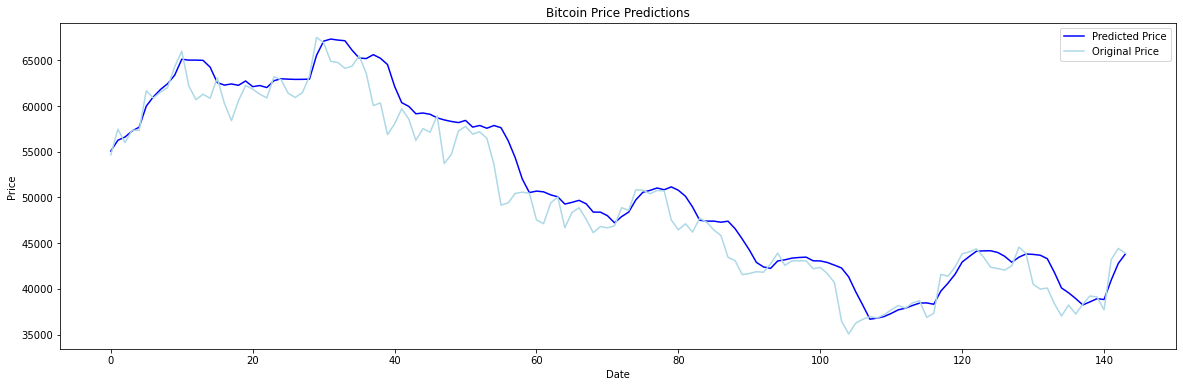

In [27]:
plt.plot(est, color = 'blue', label = 'Predicted Price')
plt.plot(test_y, color = 'lightblue', label = 'Original Price')
 
plt.title('Bitcoin Price Predictions')
plt.xlabel('Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

## Prediction

In [28]:
predict_feature = pd.read_csv('predict_feature.csv')

In [29]:
# Process the data for LSTM
testX =np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])
predict_feature

array([[[0.54238339, 0.61126824, 0.65190672, 0.30237581, 0.20485842,
         0.23595433, 0.42488987, 0.45316945, 0.26122203, 0.53940674,
         0.59048656, 0.7266844 , 0.28077754, 0.23291649, 0.22320121,
         0.39781412, 0.43610698, 0.23564326, 0.52835439, 0.5703024 ,
         0.65288979, 0.30237581, 0.2276556 , 0.21294701, 0.36698343,
         0.40669111, 0.21667954, 0.53695683, 0.57208171, 0.63260644,
         0.2699784 , 0.2392123 , 0.2168031 , 0.39695217, 0.43021982,
         0.26408256, 0.54084614, 0.56495837, 0.65878588, 0.24838013,
         0.24202961, 0.22761741, 0.41408988, 0.44248808, 0.28047441]]])

In [30]:
predicted_price = lstm.predict(predict_feature)

predicted_price_df = pd.DataFrame(predicted_price, columns=['Predicted Price'])
    
# Scale Back Result
close_mean = test['Close_mean'][-5:].mean()
close_std = test['Close_std'][-5:].mean()
est = predicted_price_df['Predicted Price'] * close_std + close_mean

In [31]:
est

0    40991.34375
Name: Predicted Price, dtype: float32

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 40991.34375 on 4 Mar 2022.